In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("../Changes_in_PA/data/OAI/merged_three_OAI.csv")
df.shape

(4308, 1817)

In [3]:
print("PASE baseline, number of NaN:", df.V00PASE.isna().sum())
print("PASE followup, number of NaN:", df.V01PASE.isna().sum())

PASE baseline, number of NaN: 0
PASE followup, number of NaN: 0


#### Distribution of V00PASE and V01PASE and changes 

/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


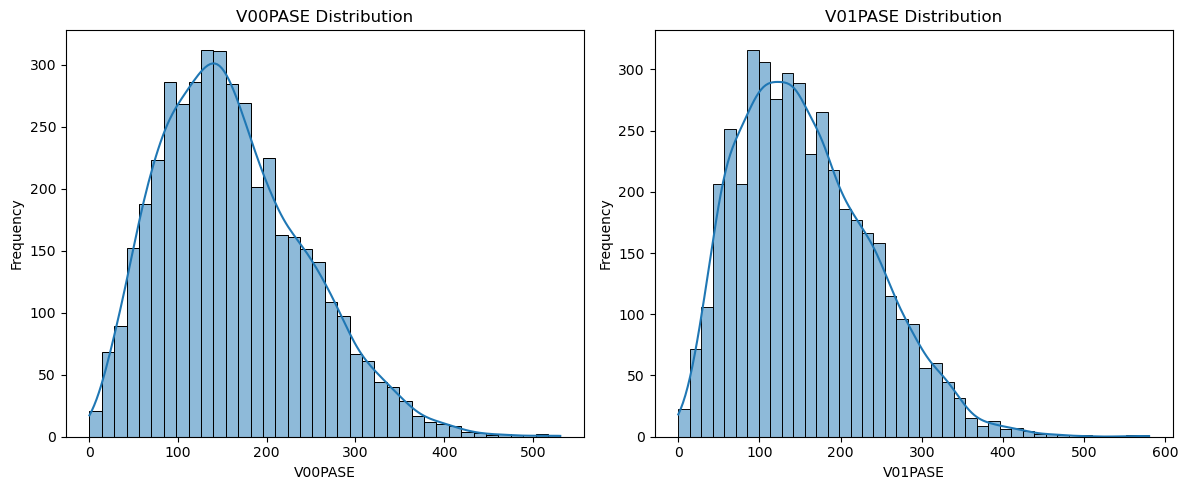

V00PASE Max: 531.0, Min: 0.0
V01PASE Max: 580.0, Min: 0.0
Shape dataframe: (4308, 1817)


In [4]:
# Setting up the figure and axes for the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for V00PASE
sns.histplot(df['V00PASE'], kde=True, ax=axes[0])  # Adding the plot to the first subplot
axes[0].set_title('V00PASE Distribution')
axes[0].set_xlabel('V00PASE')
axes[0].set_ylabel('Frequency')

# Plot for V01PASE
sns.histplot(df['V01PASE'], kde=True, ax=axes[1])  # Adding the plot to the second subplot
axes[1].set_title('V01PASE Distribution')
axes[1].set_xlabel('V01PASE')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

# Printing the max and min values for both V00PASE and V01PASE
print(f"V00PASE Max: {df.V00PASE.max()}, Min: {df.V00PASE.min()}")
print(f"V01PASE Max: {df.V01PASE.max()}, Min: {df.V01PASE.min()}")
print("Shape dataframe:", df.shape)


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_3918/3914710000.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')


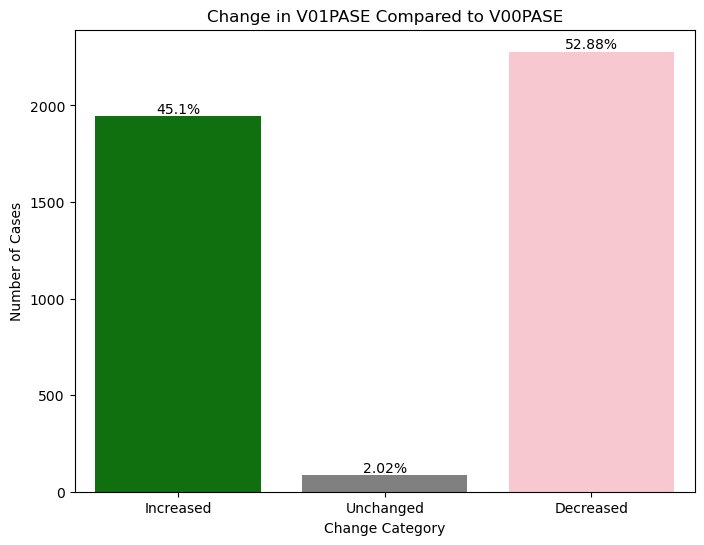

V00PASE Max: 531.0, Min: 0.0
V01PASE Max: 580.0, Min: 0.0
Shape of dataframe: (4308, 1819)


In [5]:
# Calculate the difference
df['change'] = df['V01PASE'] - df['V00PASE']

# Categorize the changes
def categorize_change(x):
    if x > 0:
        return 'Increased'
    elif x < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

df['change_category'] = df['change'].apply(categorize_change)

# Visualize the distribution of changes with specified order and colors
fig, ax = plt.subplots(figsize=(8, 6))

# Define the order and corresponding colors
order = ['Increased', 'Unchanged', 'Decreased']
colors = {'Increased': 'green', 'Unchanged': 'grey', 'Decreased': 'pink'}

# Count the number of occurrences in each category
change_counts = df['change_category'].value_counts()[order]

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot using the specified order and color mapping
sns.barplot(x=change_counts.index, y=change_counts.values, palette=colors, ax=ax)

ax.set_title('Change in V01PASE Compared to V00PASE')
ax.set_xlabel('Change Category')
ax.set_ylabel('Number of Cases')

# Annotate each bar with the percentage of cases
for i, value in enumerate(change_counts.values):
    ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')

plt.show()

# Printing the max and min values for both V00PASE and V01PASE, and DataFrame shape
print(f"V00PASE Max: {df.V00PASE.max()}, Min: {df.V00PASE.min()}")
print(f"V01PASE Max: {df.V01PASE.max()}, Min: {df.V01PASE.min()}")
print(f"Shape of dataframe: {df.shape}")


In [6]:
# part 10: 4% cases
# part 9: 2% cases
# part 8: 9% cases
# part 7: 16% cases
# part 6: 24% cases
# part 5: 14% cases
# part 4: 22% cases
# part 3: 6% cases
# part 2: 2% cases
# part 1: 1% cases

#### Make the dataset to 10 part as GLAD (Jan)

In [7]:
len(df)

4308

In [8]:
def divide_into_parts(df, column):
    # Calculate the number of cases for each part
    num_cases = len(df)
    percentages = [1, 2, 6, 22, 14, 24, 16, 9, 2, 4]
    cases_per_part = [int(num_cases * (p / 100.0)) for p in percentages]
    
    # Calculate the cumulative sum of cases to determine the cut points
    cut_points = np.cumsum(cases_per_part)
    
    # Sort the column and determine the part for each value
    sorted_indices = df[column].sort_values().index
    part = np.ones(num_cases, dtype=int)  # Initialize all as Part 1
    
    # Assign parts based on the cut points
    current_part = 2  # Starting from Part 2
    for cut_point in cut_points[:-1]:  # Exclude the last point
        part[sorted_indices[cut_point:]] = current_part
        current_part += 1
    
    # Return the parts
    return part

# Apply the function to both variables and create new columns for the parts
df['V00PASE_Part'] = divide_into_parts(df, 'V00PASE')
df['V01PASE_Part'] = divide_into_parts(df, 'V01PASE')


In [9]:
v00pase_part_counts = df['V00PASE_Part'].value_counts().sort_index()
print("Cases in each part for V00PASE_Part:\n", v00pase_part_counts)


Cases in each part for V00PASE_Part:
 V00PASE_Part
1       43
2       86
3      258
4      947
5      603
6     1033
7      689
8      387
9       86
10     176
Name: count, dtype: int64


In [10]:
v01pase_part_counts = df['V01PASE_Part'].value_counts().sort_index()
print("Cases in each part for V01PASE_Part:\n", v01pase_part_counts)


Cases in each part for V01PASE_Part:
 V01PASE_Part
1       43
2       86
3      258
4      947
5      603
6     1033
7      689
8      387
9       86
10     176
Name: count, dtype: int64


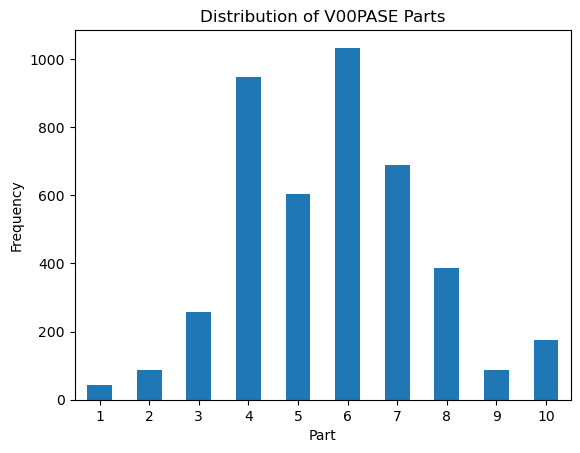

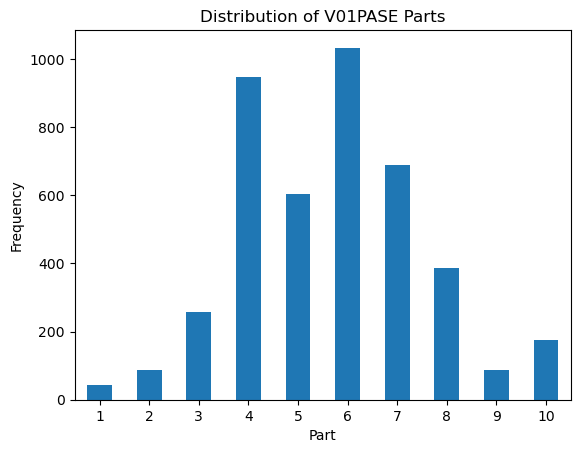

In [11]:
# Visualization for V00PASE
df['V00PASE_Part'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of V00PASE Parts')
plt.xlabel('Part')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Visualization for V01PASE
df['V01PASE_Part'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of V01PASE Parts')
plt.xlabel('Part')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [12]:
# Determine increased and decreased physical activity
df['Activity_Change'] = 'No Change'
df.loc[df['V01PASE_Part'] > df['V00PASE_Part'], 'Activity_Change'] = 'Increased'
df.loc[df['V01PASE_Part'] < df['V00PASE_Part'], 'Activity_Change'] = 'Decreased'

# Count the number of cases for each change category
activity_change_summary = df['Activity_Change'].value_counts()


In [13]:
# Calculate the percentage of cases for each activity change category
activity_change_percentage = df['Activity_Change'].value_counts(normalize=True) * 100

# Print the percentages
print("Percentage of cases for each activity change category:\n", activity_change_percentage)


Percentage of cases for each activity change category:
 Activity_Change
Decreased    34.122563
Increased    33.774373
No Change    32.103064
Name: proportion, dtype: float64


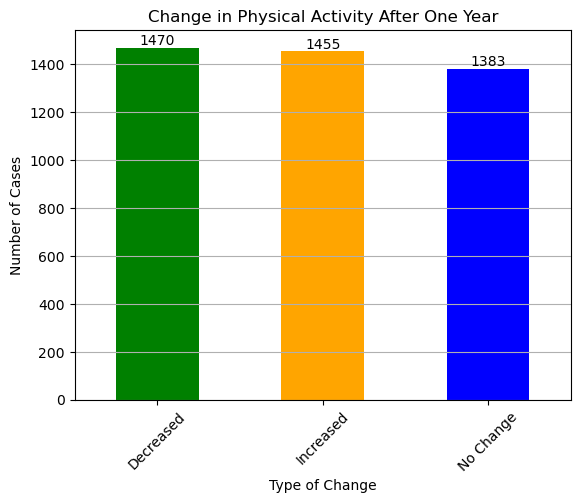

In [14]:
# Visualize the summary of activity changes
activity_change_summary.plot(kind='bar', color=['green', 'orange', 'blue'])
plt.title('Change in Physical Activity After One Year')
plt.xlabel('Type of Change')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the number of cases on the bars
for index, value in enumerate(activity_change_summary):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


In [15]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,change,change_category,V00PASE_Part,V01PASE_Part,Activity_Change
0,b'9000099',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,-13.0,Decreased,5,5,No Change
1,b'9000296',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Unchanged,6,6,No Change
2,b'9000622',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,-39.0,Decreased,6,5,Decreased
3,b'9000798',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,35.0,Increased,7,8,Increased
4,b'9001104',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,-7.0,Decreased,6,6,No Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9999295',2.0,NaN,28800.0,0.0,1.0,NaN,NaN,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,11.0,Increased,6,7,Increased
4304,b'9999365',1.0,27600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,42.0,Increased,7,7,No Change
4305,b'9999862',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,29.0,Increased,6,7,Increased
4306,b'9999865',1.0,36600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-13.0,Decreased,4,4,No Change


#### Quintile

In [16]:
df.shape

(4308, 1822)

In [17]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,change,change_category,V00PASE_Part,V01PASE_Part,Activity_Change
0,b'9000099',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,-13.0,Decreased,5,5,No Change
1,b'9000296',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Unchanged,6,6,No Change
2,b'9000622',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,-39.0,Decreased,6,5,Decreased
3,b'9000798',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,35.0,Increased,7,8,Increased
4,b'9001104',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,NaN,0.0,0.0,-7.0,Decreased,6,6,No Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9999295',2.0,NaN,28800.0,0.0,1.0,NaN,NaN,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,11.0,Increased,6,7,Increased
4304,b'9999365',1.0,27600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,42.0,Increased,7,7,No Change
4305,b'9999862',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,29.0,Increased,6,7,Increased
4306,b'9999865',1.0,36600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-13.0,Decreased,4,4,No Change


Quintile edges: [0, 20, 40, 60, 80, 100]


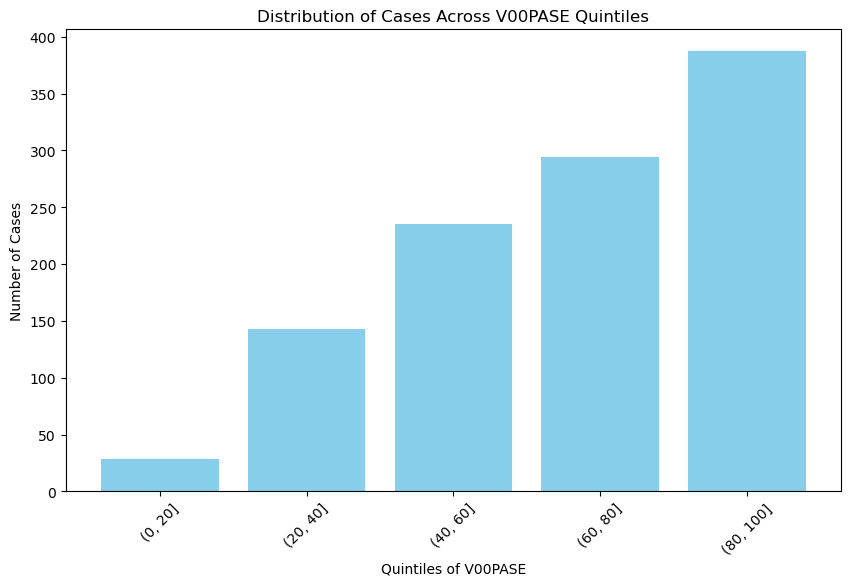

Number of cases in each quintile:
V00PASE_quintiles
0.0     29
1.0    143
2.0    235
3.0    294
4.0    387
Name: count, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'V00PASE' is the column you're working with.
# Manually define the bin edges for quintiles. This is an illustrative example;
# you should adjust these based on your data.
bin_edges = [0, 20, 40, 60, 80, 100]  # Example bin edges; adjust based on your data analysis.

# Use pd.cut to divide the data into quintiles with the defined bin edges
df['V00PASE_quintiles'] = pd.cut(df['V00PASE'], bins=bin_edges, labels=False, include_lowest=True)

# Since we manually define bin edges, we directly use them instead of retrieving from the function
print("Quintile edges:", bin_edges)

# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()

# Plotting the distribution of cases within the quintiles
plt.figure(figsize=(10, 6))

# Generate labels for each quintile based on the bin edges
labels = [f"({bin_edges[i]}, {bin_edges[i+1]}]" for i in range(len(bin_edges)-1)]

plt.bar(labels, quintile_counts, color='skyblue', align='center')
plt.xlabel('Quintiles of V00PASE')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases Across V00PASE Quintiles')
plt.xticks(rotation=45)
plt.show()

print("Number of cases in each quintile:")
print(quintile_counts)


Quintile edges: [  0.   89.  132.  172.2 232.  531. ]


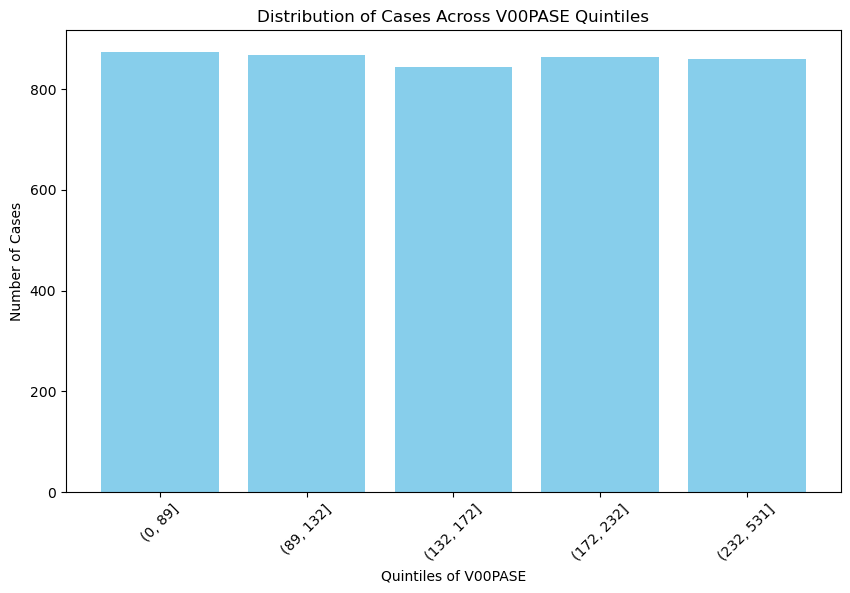

Number of cases in each quintile:
V00PASE_quintiles
0    873
1    868
2    844
3    864
4    859
Name: count, dtype: int64


In [19]:
# Use pd.qcut to divide the data into quintiles
df['V00PASE_quintiles'], bins = pd.qcut(df['V00PASE'], 5, labels=False, retbins=True) 

# The bins here represent the edges of the quintiles
print("Quintile edges:", bins)

# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()

# Plotting the distribution of cases within the quintiles
plt.figure(figsize=(10, 6))

# Generate labels for each quintile based on the bin edges
labels = [f"({int(bins[i])}, {int(bins[i+1])}]" for i in range(len(bins)-1)]

plt.bar(labels, quintile_counts, color='skyblue', align='center')
plt.xlabel('Quintiles of V00PASE')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases Across V00PASE Quintiles')
plt.xticks(rotation=45)
plt.show()


# Count the number of cases in each quintile
quintile_counts = df['V00PASE_quintiles'].value_counts().sort_index()
print("Number of cases in each quintile:")
print(quintile_counts)

In [20]:
df

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,change,change_category,V00PASE_Part,V01PASE_Part,Activity_Change,V00PASE_quintiles
0,b'9000099',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,1.0,-13.0,Decreased,5,5,No Change,1
1,b'9000296',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Unchanged,6,6,No Change,3
2,b'9000622',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,-39.0,Decreased,6,5,Decreased,2
3,b'9000798',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,35.0,Increased,7,8,Increased,4
4,b'9001104',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,0.0,0.0,-7.0,Decreased,6,6,No Change,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9999295',2.0,NaN,28800.0,0.0,1.0,NaN,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,11.0,Increased,6,7,Increased,3
4304,b'9999365',1.0,27600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,42.0,Increased,7,7,No Change,3
4305,b'9999862',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,0.0,0.0,29.0,Increased,6,7,Increased,3
4306,b'9999865',1.0,36600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,-13.0,Decreased,4,4,No Change,1


#### Tertile based on 15% 70% 15%

##### Baseline

In [21]:
####### in df_sorted

Baseline_Group
Highest 15%     646
Lowest 15%      646
Middle 70%     3016
Name: count, dtype: int64


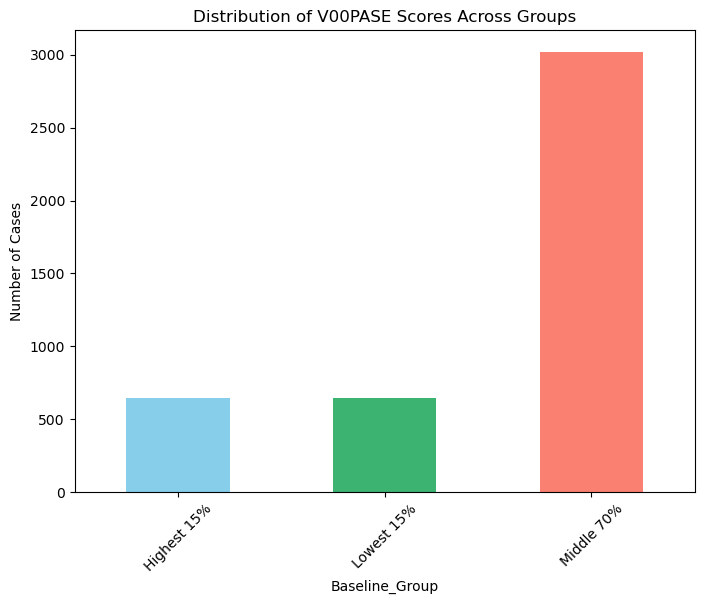

Lowest 15% Value Range: 0.0 to 76.0
Middle 70% Value Range: 76.0 to 252.0
Highest 15% Value Range: 252.0 to 531.0


In [22]:
############################### PASE tertile with same number of cases in three group #############################

# Sort 'df' by 'V00PASE' to ensure we can accurately pick the top and bottom 15%
df_sorted = df.sort_values(by='V00PASE')

# Calculate the number of cases for each group
total_cases = len(df_sorted)
cases_15_percent = int(np.floor(total_cases * 0.15))  # Number of cases for 15%

# Assign groups
df_sorted['Baseline_Group'] = 'Middle 70%'  # Default to middle
df_sorted.iloc[:cases_15_percent, df_sorted.columns.get_loc('Baseline_Group')] = 'Lowest 15%'  # Bottom 15%
df_sorted.iloc[-cases_15_percent:, df_sorted.columns.get_loc('Baseline_Group')] = 'Highest 15%'  # Top 15%

# Verify the distribution across the groups
group_counts = df_sorted['Baseline_Group'].value_counts().sort_index()
print(group_counts)

# Plotting the result
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of V00PASE Scores Across Groups')
plt.xlabel('Baseline_Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()



# Determine the min and max 'V00PASE' values in each group
lowest_15_min_max = df_sorted[df_sorted['Baseline_Group'] == 'Lowest 15%']['V00PASE'].agg(['min', 'max'])
middle_70_min_max = df_sorted[df_sorted['Baseline_Group'] == 'Middle 70%']['V00PASE'].agg(['min', 'max'])
highest_15_min_max = df_sorted[df_sorted['Baseline_Group'] == 'Highest 15%']['V00PASE'].agg(['min', 'max'])

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {lowest_15_min_max['min']} to {lowest_15_min_max['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max['min']} to {middle_70_min_max['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max['min']} to {highest_15_min_max['max']}")


##### Follow-up

Followup_Group
Highest 15%     646
Lowest 15%      646
Middle 70%     3016
Name: count, dtype: int64


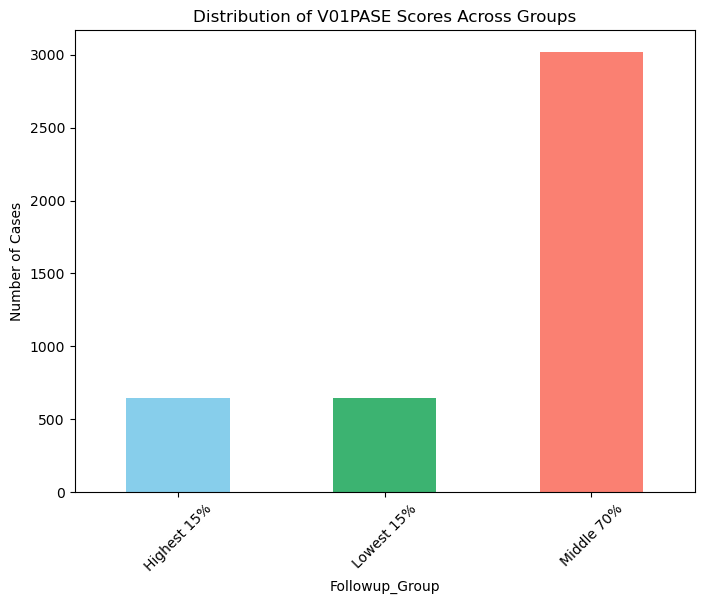

Lowest 15% Value Range: 0.0 to 69.0
Middle 70% Value Range: 70.0 to 246.0
Highest 15% Value Range: 247.0 to 580.0


In [23]:
############################### PASE tertile with same number of cases in three group #############################

# Sort 'df_sorted' by 'V01PASE' to ensure we can accurately pick the top and bottom 15%
df_sorted = df_sorted.sort_values(by='V01PASE')

# Calculate the number of cases for each group
total_cases = len(df_sorted)
cases_15_percent = int(np.floor(total_cases * 0.15))  # Number of cases for 15%

# Assign groups
df_sorted['Followup_Group'] = 'Middle 70%'  # Default to middle
df_sorted.iloc[:cases_15_percent, df_sorted.columns.get_loc('Followup_Group')] = 'Lowest 15%'  # Bottom 15%
df_sorted.iloc[-cases_15_percent:, df_sorted.columns.get_loc('Followup_Group')] = 'Highest 15%'  # Top 15%

# Verify the distribution across the groups
group_counts = df_sorted['Followup_Group'].value_counts().sort_index()
print(group_counts)

# Plotting the result
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of V01PASE Scores Across Groups')
plt.xlabel('Followup_Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()



# Determine the min and max 'V01PASE' values in each group
lowest_15_min_max = df_sorted[df_sorted['Followup_Group'] == 'Lowest 15%']['V01PASE'].agg(['min', 'max'])
middle_70_min_max = df_sorted[df_sorted['Followup_Group'] == 'Middle 70%']['V01PASE'].agg(['min', 'max'])
highest_15_min_max = df_sorted[df_sorted['Followup_Group'] == 'Highest 15%']['V01PASE'].agg(['min', 'max'])

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {lowest_15_min_max['min']} to {lowest_15_min_max['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max['min']} to {middle_70_min_max['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max['min']} to {highest_15_min_max['max']}")


In [24]:
df_sorted

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V10IMAGESF,V10IMAGESG,change,change_category,V00PASE_Part,V01PASE_Part,Activity_Change,V00PASE_quintiles,Baseline_Group,Followup_Group
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%
260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,-205.0,Decreased,7,1,Decreased,3,Middle 70%,Lowest 15%
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%
1043,b'9274208',1.0,45600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,-27.0,Decreased,2,1,Decreased,0,Lowest 15%,Lowest 15%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,85.0,Increased,10,10,No Change,4,Highest 15%,Highest 15%
1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,1.0,124.0,Increased,10,10,No Change,4,Highest 15%,Highest 15%
2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,325.0,Increased,6,10,Increased,3,Middle 70%,Highest 15%
3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,147.0,Increased,10,10,No Change,4,Highest 15%,Highest 15%


##### Increase / Decrease

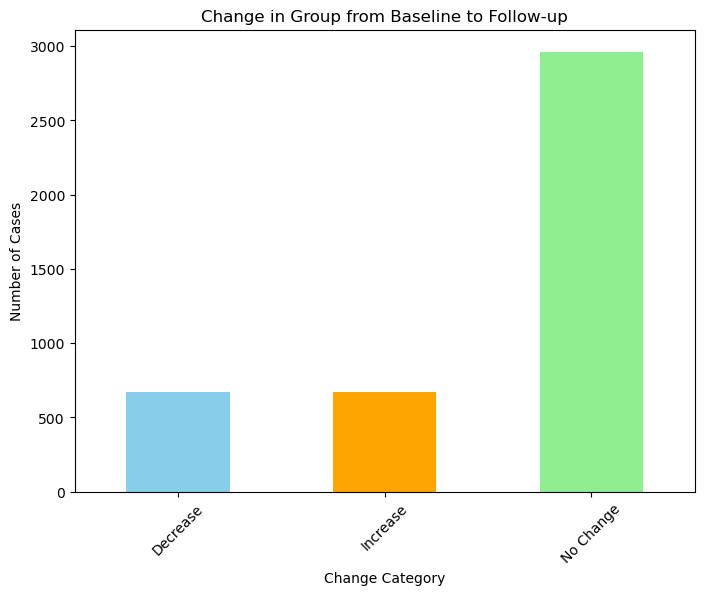

Change
Decrease      672
Increase      673
No Change    2963
Name: count, dtype: int64


In [25]:
# Mapping groups to numeric values to facilitate comparison
group_to_numeric = {'Lowest 15%': 1, 'Middle 70%': 2, 'Highest 15%': 3}

# Convert 'Baseline_Group' and 'Followup_Group' to numeric values for comparison
df_sorted['Baseline_Group_numeric'] = df_sorted['Baseline_Group'].map(group_to_numeric)
df_sorted['Followup_Group_numeric'] = df_sorted['Followup_Group'].map(group_to_numeric)

# Determine the change direction: Increase, Decrease, or No Change
df_sorted['Change'] = df_sorted.apply(lambda row: 'Increase' if row['Followup_Group_numeric'] > row['Baseline_Group_numeric']
                                      else ('Decrease' if row['Followup_Group_numeric'] < row['Baseline_Group_numeric']
                                            else 'No Change'), axis=1)

# Count the occurrences of each change category
change_counts = df_sorted['Change'].value_counts().sort_index()

# Plotting the result
plt.figure(figsize=(8, 6))
change_counts.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Change in Group from Baseline to Follow-up')
plt.xlabel('Change Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Optionally, display the counts
print(change_counts)


In [26]:
df_sorted

,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,change_category,V00PASE_Part,V01PASE_Part,Activity_Change,V00PASE_quintiles,Baseline_Group,Followup_Group,Baseline_Group_numeric,Followup_Group_numeric,Change
327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%,1,1,No Change
260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Decreased,7,1,Decreased,3,Middle 70%,Lowest 15%,2,1,Decrease
3219,b'9745853',1.0,31920.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%,1,1,No Change
4047,b'9932092',1.0,28200.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Unchanged,1,1,No Change,0,Lowest 15%,Lowest 15%,1,1,No Change
1043,b'9274208',1.0,45600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Decreased,2,1,Decreased,0,Lowest 15%,Lowest 15%,1,1,No Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Increased,10,10,No Change,4,Highest 15%,Highest 15%,3,3,No Change
1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Increased,10,10,No Change,4,Highest 15%,Highest 15%,3,3,No Change
2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Increased,6,10,Increased,3,Middle 70%,Highest 15%,2,3,Increase
3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,Increased,10,10,No Change,4,Highest 15%,Highest 15%,3,3,No Change


#### Tertiles based on the specified cut points in the paper (31–152 for tertile1, 153–207 for tertile2, and 208–368 for tertile3 ):

##### Baseline

In [27]:
df.V00PASE.max()

531.0

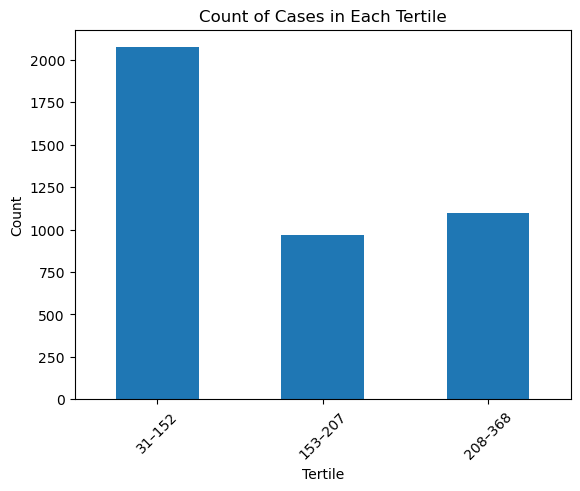

TertileBaselinePase
31–152     2074
153–207     970
208–368    1097
Name: count, dtype: int64
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


In [28]:
########### Baseline
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertileBaselinePase'] = pd.cut(df['V00PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertileBaselinePase'].value_counts().sort_index()

# Plot the count
tertile_counts.plot(kind='bar')
plt.xlabel('Tertile')
plt.ylabel('Count')
plt.title('Count of Cases in Each Tertile')
plt.xticks(rotation=45)
plt.show()

tertile_counts = df['TertileBaselinePase'].value_counts().sort_index()

# Display the counts
print(tertile_counts)
print(df.TertileBaselinePase.unique())

##### Follow-up

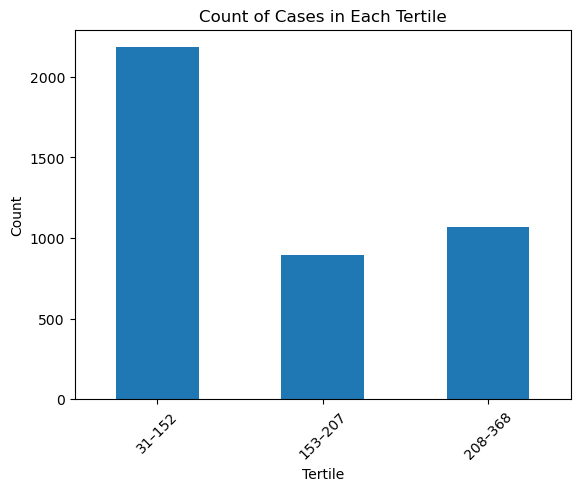

TertilefollowupPase
31–152     2183
153–207     896
208–368    1070
Name: count, dtype: int64
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


In [29]:

########### Follow up
# Adjust bins and labels to match the specified ranges correctly
# Correcting the approach to include only the relevant ranges
bins = [31, 152, 207, 368]  # Adjusted to start at 31 as per the original tertile definitions
labels = ['31–152', '153–207', '208–368']

# Now using pd.cut() with the corrected bins and labels
df['TertilefollowupPase'] = pd.cut(df['V01PASE'], bins=bins, labels=labels, include_lowest=True, right=True)

# Count the number of cases in each tertile
tertile_counts = df['TertilefollowupPase'].value_counts().sort_index()

# Plot the count
tertile_counts.plot(kind='bar')
plt.xlabel('Tertile')
plt.ylabel('Count')
plt.title('Count of Cases in Each Tertile')
plt.xticks(rotation=45)
plt.show()

tertile_counts = df['TertilefollowupPase'].value_counts().sort_index()

# Display the counts
print(tertile_counts)
print(df.TertilefollowupPase.unique())

In [30]:
print("value count:")
print(df.TertileBaselinePase.value_counts())
print("---------")
print(df.TertilefollowupPase.value_counts())
print("---------")
print("unique:")
print(df.TertileBaselinePase.unique())
print("---------")
print(df.TertilefollowupPase.unique())

value count:
TertileBaselinePase
31–152     2074
208–368    1097
153–207     970
Name: count, dtype: int64
---------
TertilefollowupPase
31–152     2183
208–368    1070
153–207     896
Name: count, dtype: int64
---------
unique:
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']
---------
['31–152', '153–207', '208–368', NaN]
Categories (3, object): ['31–152' < '153–207' < '208–368']


In [31]:
df = df.dropna(subset=['TertilefollowupPase', 'TertileBaselinePase'])

In [32]:
print("value count:")
print(df.TertileBaselinePase.value_counts())
print("---------")
print(df.TertilefollowupPase.value_counts())
print("---------")
print("unique:")
print(df.TertileBaselinePase.unique())
print("---------")
print(df.TertilefollowupPase.unique())

value count:
TertileBaselinePase
31–152     1999
208–368    1065
153–207     953
Name: count, dtype: int64
---------
TertilefollowupPase
31–152     2111
208–368    1030
153–207     876
Name: count, dtype: int64
---------
unique:
['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']
---------
['31–152', '153–207', '208–368']
Categories (3, object): ['31–152' < '153–207' < '208–368']


##### Increase / Decreased

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_3918/1780228347.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerical = df.replace(category_map)
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_3918/1780228347.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_numerical = df.replace(category_map)
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_3918/1780228347.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explic

Change
No Change    2403
Decreased     871
Increased     743
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_3918/1780228347.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change'] = df_numerical.apply(lambda row: categorize_change(row), axis=1)


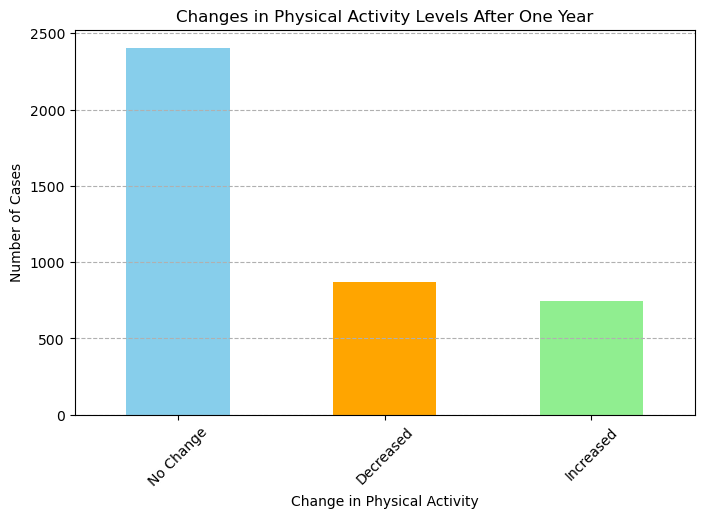

In [33]:
# Map categories to numerical values for easier comparison
categories = ['31–152', 
              '153–207', 
              '208–368']
category_map = {category: i for i, category in enumerate(categories)}
df_numerical = df.replace(category_map)

# Function to determine change
def categorize_change(row):
    if row['TertileBaselinePase'] < row['TertilefollowupPase']:
        return 'Increased'
    elif row['TertileBaselinePase'] > row['TertilefollowupPase']:
        return 'Decreased'
    else:
        return 'No Change'

# Add 'Change' column based on comparison
df['Change'] = df_numerical.apply(lambda row: categorize_change(row), axis=1)

# Count how many cases increased, decreased, or had no change
change_counts = df['Change'].value_counts()

# Display the counts
print(change_counts)


# Plot the counts
plt.figure(figsize=(8, 5))
change_counts.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Changes in Physical Activity Levels After One Year')
plt.xlabel('Change in Physical Activity')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

